In [3]:
# data exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# modeling
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

**Persiapan Data**

In [4]:
# import data
data = pd.read_excel("Data Komlan.xlsx", sheet_name="Asli dari BMKG (2)")
data.head(30)

,Tanggal,Suhu Min,Suhu Max,Kelembapan Rata-rata,Curah Hujan,Lamanya Penyinaran Matahari,Arah angin saat Kecepatan Max,Kecepatan angin rata-rata,arah angin terbanyak
0,01-01-2002,23.0,29.9,92,22.0,2.7,270.0,0.0,W
1,02-01-2002,23.0,30.0,91,57.0,4.1,270.0,1.0,W
2,03-01-2002,23.0,28.5,91,33.0,0.4,270.0,1.0,W
3,04-01-2002,24.0,28.8,88,1.5,2.5,270.0,0.0,W
4,05-01-2002,24.0,30.0,82,NaN,4.8,270.0,2.0,W
5,06-01-2002,23.0,30.3,83,0.0,3.6,270.0,2.0,W
6,07-01-2002,24.0,30.0,88,17.5,3.0,270.0,1.0,W
7,08-01-2002,22.0,30.9,82,3.0,5.6,270.0,1.0,W
8,09-01-2002,24.0,29.5,88,3.2,2.1,270.0,1.0,W
9,10-01-2002,24.0,28.4,93,4.0,0.6,270.0,1.0,W


In [5]:
# convert 'Tanggal' to date type
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d-%m-%Y', errors='coerce')

In [6]:
# check the null from the data
data.isnull().sum()

Tanggal                            0
Suhu Min                           2
Suhu Max                           1
Kelembapan Rata-rata               0
Curah Hujan                      286
Lamanya Penyinaran Matahari       12
Arah angin saat Kecepatan Max      3
Kecepatan angin rata-rata          5
arah angin terbanyak               0
dtype: int64

In [7]:
# sort the data by 'Tanggal'
data = data.sort_values(by = "Tanggal")

# set 'Tanggal' as index
data = data.set_index("Tanggal")

# drop 'arah angin terbanyak' and 'arah angin saat kecepatan max'
data.drop(columns = ["arah angin terbanyak","Arah angin saat Kecepatan Max"], inplace = True)

In [8]:
# check the information from the data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3652 entries, 2002-01-01 to 2011-12-31
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Suhu Min                     3650 non-null   float64
 1   Suhu Max                     3651 non-null   float64
 2   Kelembapan Rata-rata         3652 non-null   int64  
 3   Curah Hujan                  3366 non-null   float64
 4   Lamanya Penyinaran Matahari  3640 non-null   float64
 5   Kecepatan angin rata-rata    3647 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 199.7 KB


In [9]:
# check the data again
data.head(30)

,Suhu Min,Suhu Max,Kelembapan Rata-rata,Curah Hujan,Lamanya Penyinaran Matahari,Kecepatan angin rata-rata
Tanggal,,,,,,
2002-01-01,23.0,29.9,92,22.0,2.7,0.0
2002-01-02,23.0,30.0,91,57.0,4.1,1.0
2002-01-03,23.0,28.5,91,33.0,0.4,1.0
2002-01-04,24.0,28.8,88,1.5,2.5,0.0
2002-01-05,24.0,30.0,82,NaN,4.8,2.0
2002-01-06,23.0,30.3,83,0.0,3.6,2.0
2002-01-07,24.0,30.0,88,17.5,3.0,1.0
2002-01-08,22.0,30.9,82,3.0,5.6,1.0
2002-01-09,24.0,29.5,88,3.2,2.1,1.0


In [10]:
# Impute Missing data using KNN
from sklearn.impute import KNNImputer

imputer = KNNImputer()
imputed_data = pd.DataFrame(imputer.fit_transform(data), columns = data.columns)

In [11]:
imputed_data

,Suhu Min,Suhu Max,Kelembapan Rata-rata,Curah Hujan,Lamanya Penyinaran Matahari,Kecepatan angin rata-rata
0,23.0,29.9,92.0,22.00,2.7,0.0
1,23.0,30.0,91.0,57.00,4.1,1.0
2,23.0,28.5,91.0,33.00,0.4,1.0
3,24.0,28.8,88.0,1.50,2.5,0.0
4,24.0,30.0,82.0,0.20,4.8,2.0
...,...,...,...,...,...,...
3647,24.0,31.0,83.0,3.40,1.6,0.0
3648,23.0,32.2,86.0,23.40,3.1,1.0
3649,23.0,31.2,74.0,10.20,1.2,1.0
3650,23.0,33.1,84.0,6.74,5.5,1.0


In [12]:
# Check the info of Imputed Data
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Suhu Min                     3652 non-null   float64
 1   Suhu Max                     3652 non-null   float64
 2   Kelembapan Rata-rata         3652 non-null   float64
 3   Curah Hujan                  3652 non-null   float64
 4   Lamanya Penyinaran Matahari  3652 non-null   float64
 5   Kecepatan angin rata-rata    3652 non-null   float64
dtypes: float64(6)
memory usage: 171.3 KB


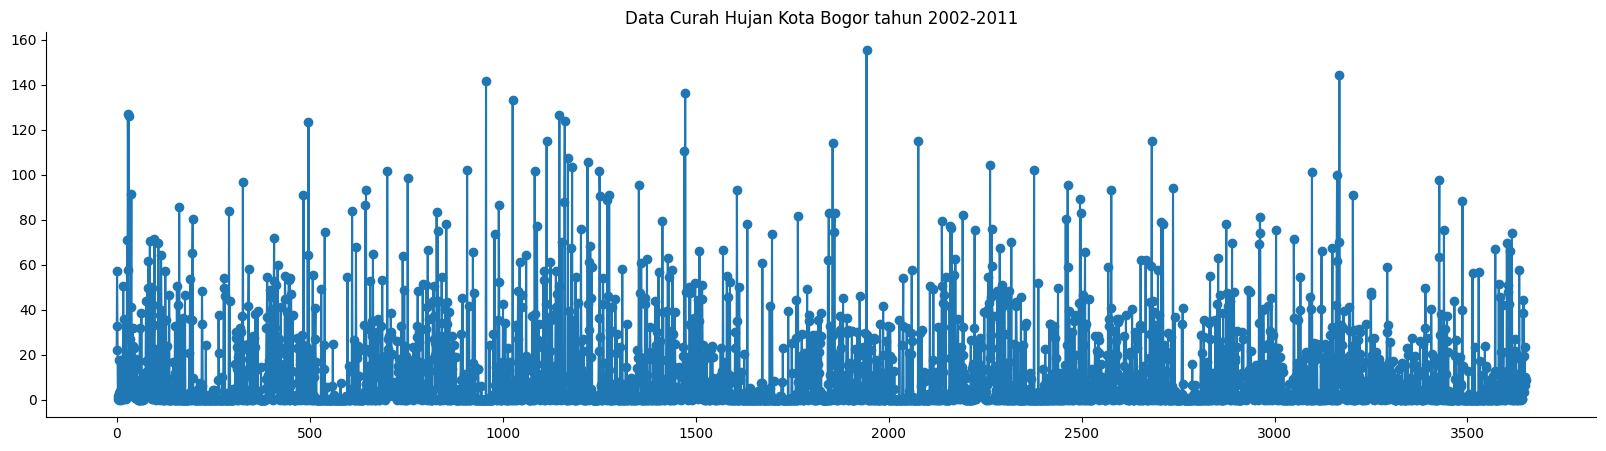

In [13]:
# Plot data 'Curah Hujan'
imputed_data['Curah Hujan'].plot(kind='line', figsize=(20, 5), title='Data Curah Hujan Kota Bogor tahun 2002-2011', marker = 'o')
plt.gca().spines[['top', 'right']].set_visible(False)

In [14]:
# Check is there any null data
imputed_data.isna().sum()

Suhu Min                       0
Suhu Max                       0
Kelembapan Rata-rata           0
Curah Hujan                    0
Lamanya Penyinaran Matahari    0
Kecepatan angin rata-rata      0
dtype: int64

In [15]:
# Create Function to Define Feature and Label with a Certain Lag
def x_y(data, lag):
    to_array = data.to_numpy()
    x = []
    y = []
    for i in range(len(to_array)-lag):
        row = to_array[i:i + lag, [0, 1, 2, 4, 5]]
        x.append(row)
        label = to_array[i + lag][3]
        y.append(label)
    return np.array(x), np.array(y)

In [16]:
x, y = x_y(imputed_data, lag = 30) #Lag 30 karena hari
x.shape, y.shape

((3622, 30, 5), (3622,))

In [17]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, shuffle = False)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2716, 30, 5), (906, 30, 5), (2716,), (906,))

**Model LSTM**

In [18]:
# define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                 patience = 25,
                                                 restore_best_weights = True)

In [19]:
# Membuat model 2 LSTM 2 Dense
model = Sequential([
    LSTM(64, return_sequences=True, activation = 'tanh'),
    LSTM(64, activation = 'tanh'),
    Dense(64, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(1)
])

# Mengompilasi model
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              loss= tf.keras.losses.MeanSquaredError()) #nanti coba pilih loss yang lain

# Melatih model
history_lstm = model.fit(x_train, y_train, epochs=100, batch_size = 32, validation_data=(x_test, y_test), callbacks = [early_stopping])

Epoch 1/100
85/85 [==============================] - 12s 64ms/step - loss: 426.9573 - val_loss: 277.8271
Epoch 2/100
85/85 [==============================] - 4s 42ms/step - loss: 391.4762 - val_loss: 269.6829
Epoch 3/100
85/85 [==============================] - 4s 45ms/step - loss: 388.7715 - val_loss: 266.6506
Epoch 4/100
85/85 [==============================] - 4s 51ms/step - loss: 377.5732 - val_loss: 264.3060
Epoch 5/100
85/85 [==============================] - 3s 40ms/step - loss: 373.8615 - val_loss: 273.0673
Epoch 6/100
85/85 [==============================] - 3s 41ms/step - loss: 372.8914 - val_loss: 263.6550
Epoch 7/100
85/85 [==============================] - 5s 59ms/step - loss: 373.6043 - val_loss: 266.8650
Epoch 8/100
85/85 [==============================] - 4s 47ms/step - loss: 370.6221 - val_loss: 262.9442
Epoch 9/100
85/85 [==============================] - 4s 48ms/step - loss: 369.4282 - val_loss: 257.6121
Epoch 10/100
85/85 [==============================] - 5s 64ms/s

In [20]:
# Memprediksi nilai
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
print(f"""
MSE:
Traning    = {mean_squared_error(y_train, train_predict)}
Testing    = {mean_squared_error(y_test, test_predict)}

RMSE:
Traning    = {tf.sqrt(mean_squared_error(y_train, train_predict))}
Testing    = {tf.sqrt(mean_squared_error(y_test, test_predict))}
""")

29/29 [==============================] - 0s 14ms/step

MSE:
Traning    = 331.8845728750009
Testing    = 232.75307398925517

RMSE:
Traning    = 18.21769943969328
Testing    = 15.256247047988413



In [21]:
# Calculate R2 score for training and testing data
r2_train = r2_score(y_train, train_predict)
r2_test = r2_score(y_test, test_predict)

print(f"""
R2 Score:
Training = {r2_train}
Testing  = {r2_test}
""")


R2 Score:
Training = 0.16291113557599457
Testing  = 0.15744608535411886



-----> hasilnya sangat overfitting, coba dense yang lain

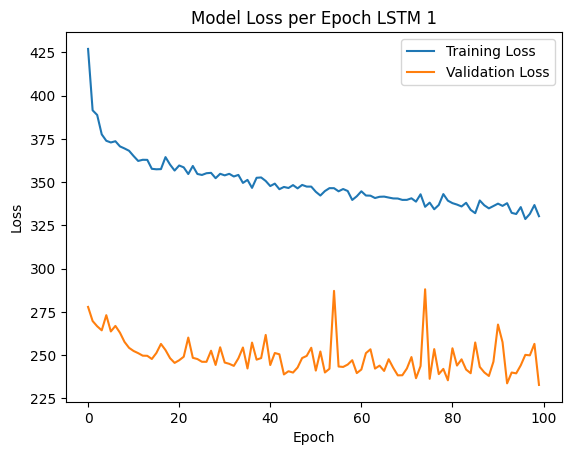

In [56]:
# Plot loss
import matplotlib.pyplot as plt

plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch LSTM 1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

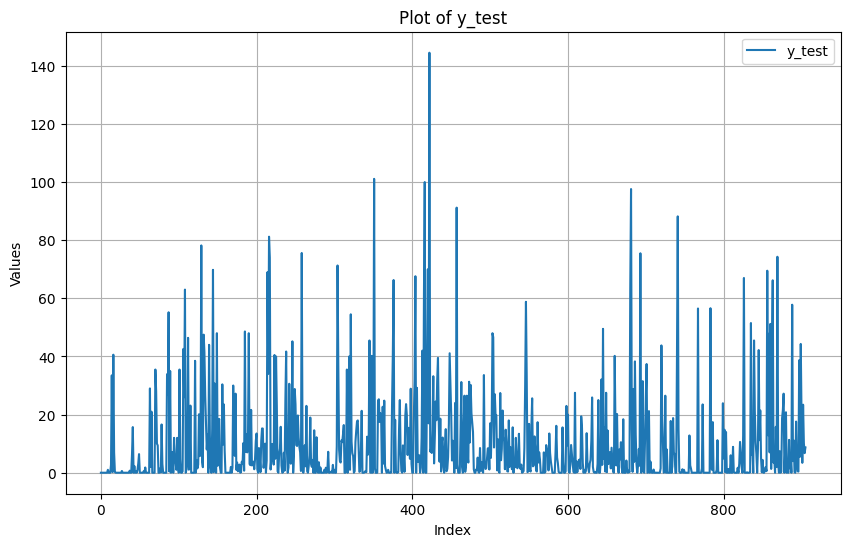

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='y_test')
plt.title('Plot of y_test')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

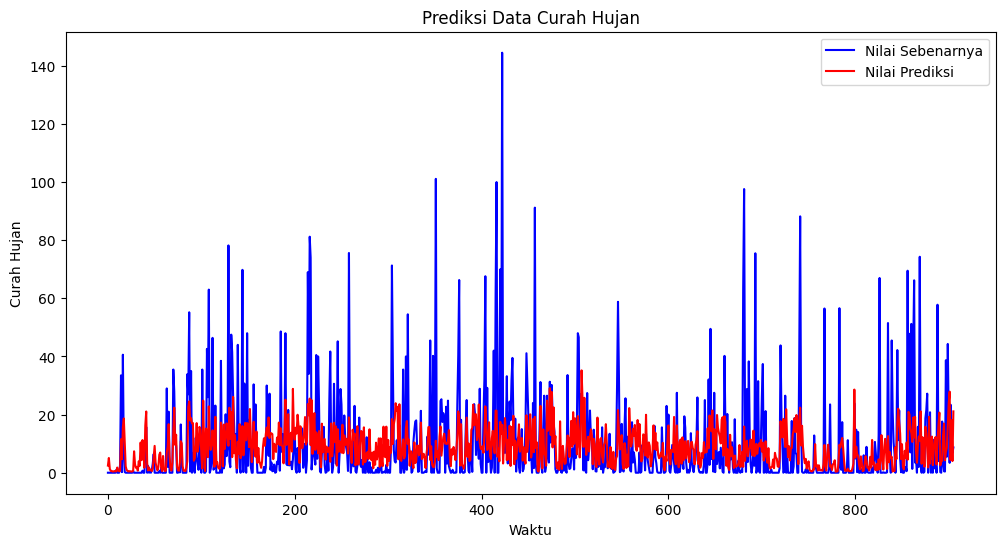

In [24]:
# Plot hasil prediksi vs nilai sebenarnya untuk data testing
plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Nilai Sebenarnya')
plt.plot(test_predict, color='red', label='Nilai Prediksi')
plt.title('Prediksi Data Curah Hujan')
plt.xlabel('Waktu')
plt.ylabel('Curah Hujan')
plt.legend()
plt.show()

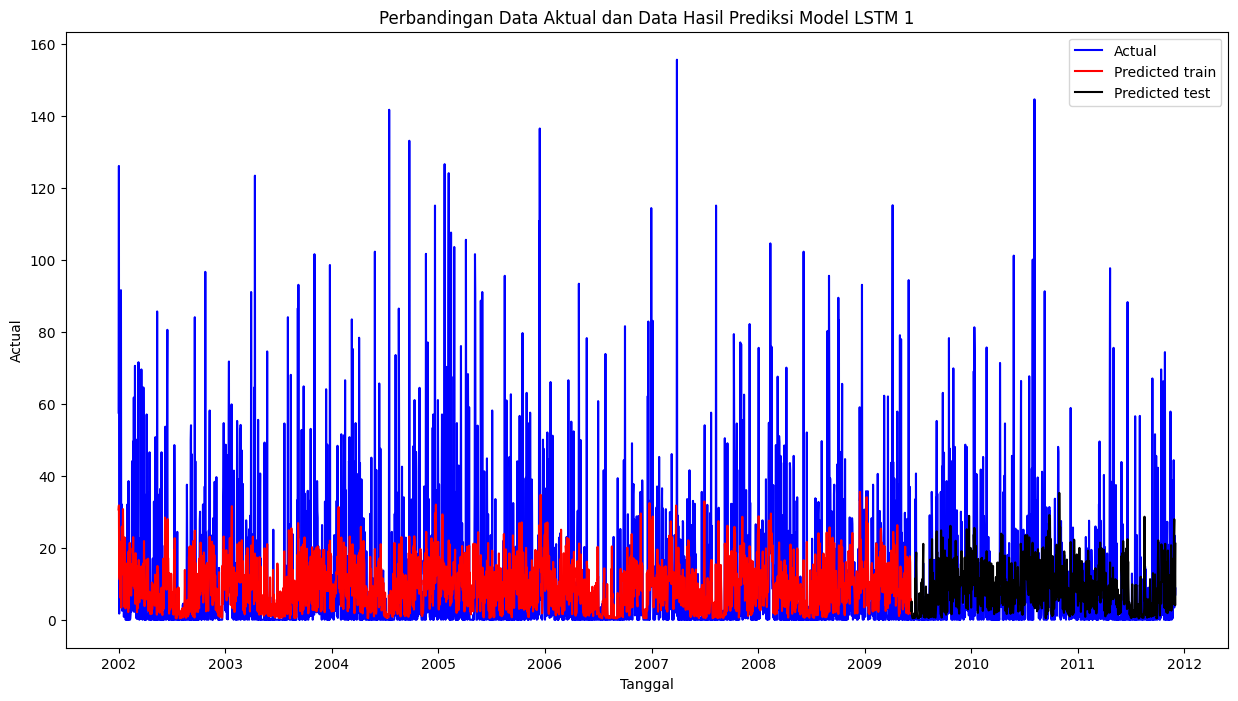

In [57]:
# Plot hasil prediksi vs nilai sebenarnya
train = pd.DataFrame()
train["Tanggal"] = data.index[data.index >= "2002-01-01"][:2716]
train["Actual"] = y_train
train["Predict"] = train_predict

test = pd.DataFrame()
test["Tanggal"] = data.index[data.index >= "2002-01-01"][2716:3622]
test["Actual"] = y_test
test["Predict"] = test_predict

# Membuat plot
fig, ax = plt.subplots(figsize = (15,8))

sns.lineplot(data = train, x = "Tanggal", y = "Actual", color = "blue", label = "Actual")
sns.lineplot(data = test, x = "Tanggal", y = "Actual", color = "blue")
sns.lineplot(data = train, x = "Tanggal", y = "Predict", color = "red", label = "Predicted train")
sns.lineplot(data = test, x = "Tanggal", y = "Predict", color = "black", label = "Predicted test")
plt.title('Perbandingan Data Aktual dan Data Hasil Prediksi Model LSTM 1')
plt.show()

# 1 LSTM 3 Dense

In [58]:
# Membuat model 1 LSTM 3 Dense
model1 = Sequential([
    LSTM(64, activation = 'tanh'),
    Dense(64, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'relu')
])

# Mengompilasi model
model1.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              loss= tf.keras.losses.MeanSquaredError()) #nanti coba pilih loss yang lain

# Melatih model
history_lstm2 = model1.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), callbacks = [early_stopping])

Epoch 1/100
85/85 [==============================] - 9s 29ms/step - loss: 419.3565 - val_loss: 280.6238
Epoch 2/100
85/85 [==============================] - 2s 21ms/step - loss: 383.0275 - val_loss: 265.1960
Epoch 3/100
85/85 [==============================] - 2s 21ms/step - loss: 375.6826 - val_loss: 263.7032
Epoch 4/100
85/85 [==============================] - 2s 20ms/step - loss: 375.4906 - val_loss: 264.0421
Epoch 5/100
85/85 [==============================] - 2s 20ms/step - loss: 370.9086 - val_loss: 269.5223
Epoch 6/100
85/85 [==============================] - 2s 23ms/step - loss: 370.5889 - val_loss: 257.9511
Epoch 7/100
85/85 [==============================] - 3s 32ms/step - loss: 367.6217 - val_loss: 258.2893
Epoch 8/100
85/85 [==============================] - 2s 25ms/step - loss: 368.0121 - val_loss: 255.6753
Epoch 9/100
85/85 [==============================] - 2s 20ms/step - loss: 368.8876 - val_loss: 265.3165
Epoch 10/100
85/85 [==============================] - 2s 21ms/st

In [59]:
# Memprediksi nilai
train_predict1 = model1.predict(x_train)
test_predict1 = model1.predict(x_test)
print(f"""
MSE:
Traning    = {mean_squared_error(y_train, train_predict1)}
Testing    = {mean_squared_error(y_test, test_predict1)}

RMSE:
Traning    = {tf.sqrt(mean_squared_error(y_train, train_predict1))}
Testing    = {tf.sqrt(mean_squared_error(y_test, test_predict1))}
""")

29/29 [==============================] - 0s 7ms/step

MSE:
Traning    = 328.7454396276058
Testing    = 239.48178038043505

RMSE:
Traning    = 18.131338605508578
Testing    = 15.47519888015773



In [60]:
# Calculate R2 score for training and testing data
r2_train_lstm2 = r2_score(y_train, train_predict1)
r2_test_lstm2 = r2_score(y_test, test_predict1)

print(f"""
R2 Score:
Training = {r2_train_lstm2}
Testing  = {r2_test_lstm2}
""")


R2 Score:
Training = 0.17082874820430838
Testing  = 0.13308852129181525



-----> OVERFITTING

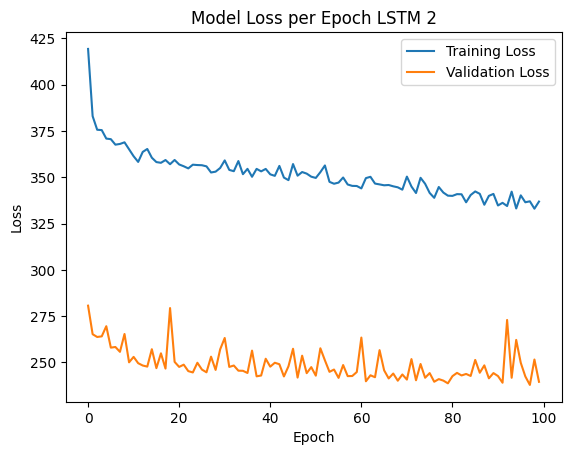

In [64]:
# Plot loss
import matplotlib.pyplot as plt

plt.plot(history_lstm2.history['loss'], label='Training Loss')
plt.plot(history_lstm2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch LSTM 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

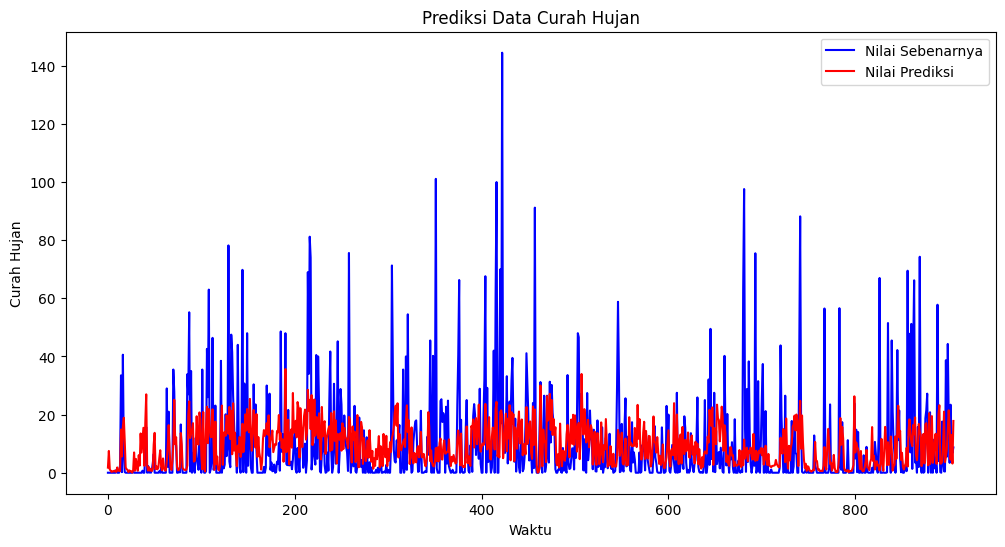

In [63]:
# Plot hasil prediksi vs nilai sebenarnya
plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Nilai Sebenarnya')
plt.plot(test_predict1, color='red', label='Nilai Prediksi')
plt.title('Prediksi Data Curah Hujan')
plt.xlabel('Waktu')
plt.ylabel('Curah Hujan')
plt.legend()
plt.show()

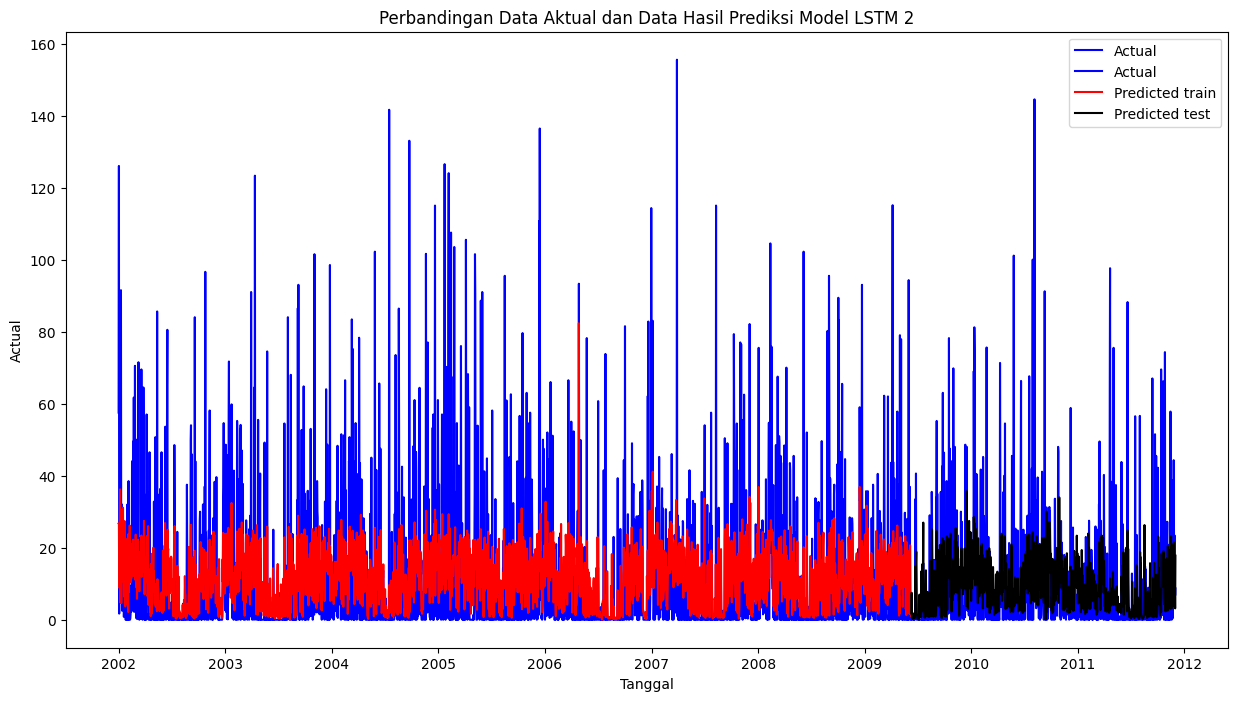

In [65]:
# Plot hasil prediksi vs nilai sebenarnya
train = pd.DataFrame()
train["Tanggal"] = data.index[data.index >= "2002-01-01"][:2716]
train["Actual"] = y_train
train["Predict"] = train_predict1

test = pd.DataFrame()
test["Tanggal"] = data.index[data.index >= "2002-01-01"][2716:3622]
test["Actual"] = y_test
test["Predict"] = test_predict1

# Membuat plot
fig, ax = plt.subplots(figsize = (15,8))

sns.lineplot(data = train, x = "Tanggal", y = "Actual", color = "blue", label = "Actual")
sns.lineplot(data = test, x = "Tanggal", y = "Actual", color = "blue", label = "Actual")
sns.lineplot(data = train, x = "Tanggal", y = "Predict", color = "red", label = "Predicted train")
sns.lineplot(data = test, x = "Tanggal", y = "Predict", color = "black", label = "Predicted test")
plt.title('Perbandingan Data Aktual dan Data Hasil Prediksi Model LSTM 2')
plt.show()

# 3 LSTM 1 Dense

In [67]:
# Membuat model 1 LSTM 3 Dense
model2 = Sequential([
    LSTM(64, activation = 'tanh', return_sequences = True),
    LSTM(64, activation = 'tanh', return_sequences = True),
    LSTM(64, activation = 'tanh'),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'relu')
])

# Mengompilasi model
model2.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              loss= tf.keras.losses.MeanSquaredError()) #nanti coba pilih loss yang lain

# Melatih model
history_lstm3 = model2.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), callbacks = [early_stopping])

Epoch 1/100
85/85 [==============================] - 17s 89ms/step - loss: 416.9489 - val_loss: 276.7662
Epoch 2/100
85/85 [==============================] - 6s 69ms/step - loss: 397.7477 - val_loss: 277.7922
Epoch 3/100
85/85 [==============================] - 5s 60ms/step - loss: 394.2588 - val_loss: 274.6546
Epoch 4/100
85/85 [==============================] - 7s 79ms/step - loss: 386.8770 - val_loss: 273.3255
Epoch 5/100
85/85 [==============================] - 5s 58ms/step - loss: 380.1640 - val_loss: 265.5684
Epoch 6/100
85/85 [==============================] - 6s 66ms/step - loss: 373.9383 - val_loss: 271.2002
Epoch 7/100
85/85 [==============================] - 10s 123ms/step - loss: 371.9696 - val_loss: 255.1042
Epoch 8/100
85/85 [==============================] - 7s 87ms/step - loss: 370.9652 - val_loss: 253.2200
Epoch 9/100
85/85 [==============================] - 7s 84ms/step - loss: 365.9084 - val_loss: 255.3686
Epoch 10/100
85/85 [==============================] - 6s 76ms

In [68]:
# Memprediksi nilai
train_predict2 = model2.predict(x_train)
test_predict2 = model2.predict(x_test)
print(f"""
MSE:
Traning    = {mean_squared_error(y_train, train_predict2)}
Testing    = {mean_squared_error(y_test, test_predict2)}

RMSE:
Traning    = {tf.sqrt(mean_squared_error(y_train, train_predict2))}
Testing    = {tf.sqrt(mean_squared_error(y_test, test_predict2))}
""")

29/29 [==============================] - 1s 20ms/step

MSE:
Traning    = 339.30922337911693
Testing    = 237.46256980193132

RMSE:
Traning    = 18.420348079749115
Testing    = 15.409820563586434



In [69]:
# Calculate R2 score for training and testing data
r2_train_lstm3 = r2_score(y_train, train_predict2)
r2_test_lstm3 = r2_score(y_test, test_predict2)

print(f"""
R2 Score:
Training = {r2_train_lstm3}
Testing  = {r2_test_lstm3}
""")


R2 Score:
Training = 0.14418446742930613
Testing  = 0.1403979576324551



----> masih underfitting

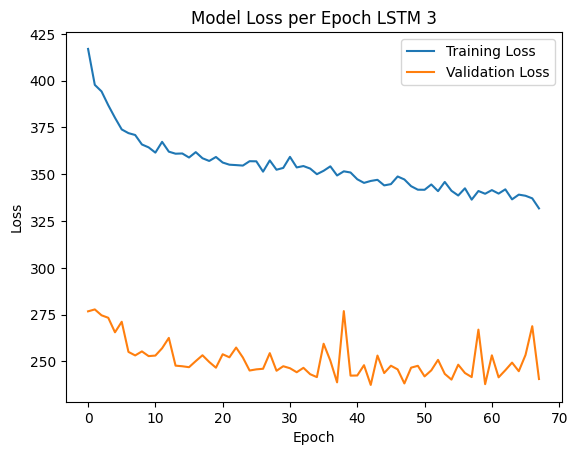

In [70]:
# Plot loss
import matplotlib.pyplot as plt

plt.plot(history_lstm3.history['loss'], label='Training Loss')
plt.plot(history_lstm3.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch LSTM 3')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

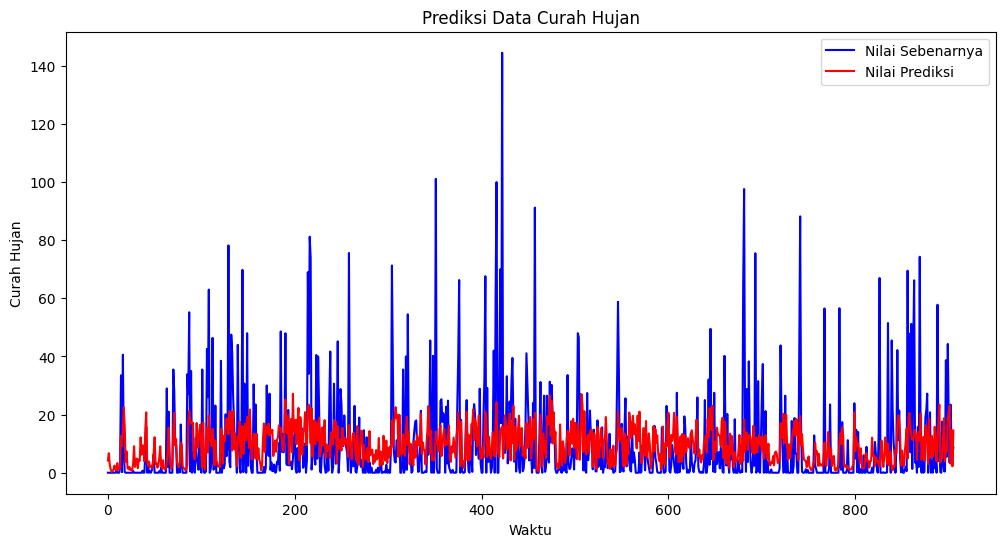

In [71]:
# Plot hasil prediksi vs nilai sebenarnya
plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Nilai Sebenarnya')
plt.plot(test_predict2, color='red', label='Nilai Prediksi')
plt.title('Prediksi Data Curah Hujan')
plt.xlabel('Waktu')
plt.ylabel('Curah Hujan')
plt.legend()
plt.show()

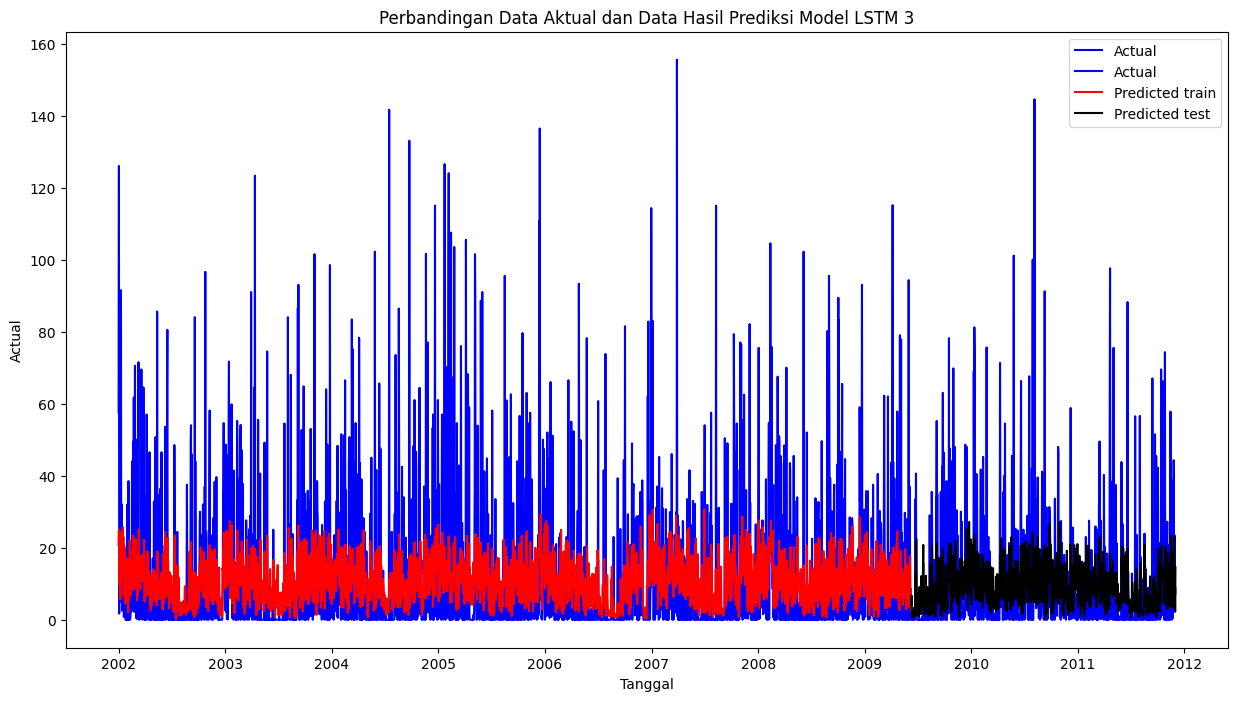

In [72]:
# Plot hasil prediksi vs nilai sebenarnya
train = pd.DataFrame()
train["Tanggal"] = data.index[data.index >= "2002-01-01"][:2716]
train["Actual"] = y_train
train["Predict"] = train_predict2

test = pd.DataFrame()
test["Tanggal"] = data.index[data.index >= "2002-01-01"][2716:3622]
test["Actual"] = y_test
test["Predict"] = test_predict2

# Membuat plot
fig, ax = plt.subplots(figsize = (15,8))

sns.lineplot(data = train, x = "Tanggal", y = "Actual", color = "blue", label = "Actual")
sns.lineplot(data = test, x = "Tanggal", y = "Actual", color = "blue", label = "Actual")
sns.lineplot(data = train, x = "Tanggal", y = "Predict", color = "red", label = "Predicted train")
sns.lineplot(data = test, x = "Tanggal", y = "Predict", color = "black", label = "Predicted test")
plt.title('Perbandingan Data Aktual dan Data Hasil Prediksi Model LSTM 3')
plt.show()

**Model MLP**

# MLP 2 Dense

In [78]:
mlp_x_train = x_train.reshape(x_train.shape[0], -1)
mlp_x_test = x_test.reshape(x_test.shape[0], -1)

mlp = Sequential([
    Dense(64),
    Dense(64),
    Dense(1)
])

mlp.compile(loss=tf.keras.losses.MeanSquaredError(),
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

# Fit the model
history_mlp = mlp.fit(mlp_x_train, y_train, validation_data=(mlp_x_test, y_test), epochs=100, callbacks = [early_stopping])

Epoch 1/100
85/85 [==============================] - 1s 6ms/step - loss: 543.7502 - val_loss: 296.5005
Epoch 2/100
85/85 [==============================] - 0s 5ms/step - loss: 419.9834 - val_loss: 389.4151
Epoch 3/100
85/85 [==============================] - 1s 6ms/step - loss: 411.2593 - val_loss: 304.3406
Epoch 4/100
85/85 [==============================] - 0s 5ms/step - loss: 397.5750 - val_loss: 288.0513
Epoch 5/100
85/85 [==============================] - 1s 6ms/step - loss: 401.6489 - val_loss: 273.6635
Epoch 6/100
85/85 [==============================] - 1s 6ms/step - loss: 416.7800 - val_loss: 289.2460
Epoch 7/100
85/85 [==============================] - 1s 7ms/step - loss: 385.3249 - val_loss: 314.5114
Epoch 8/100
85/85 [==============================] - 0s 6ms/step - loss: 384.4333 - val_loss: 357.0443
Epoch 9/100
85/85 [==============================] - 0s 4ms/step - loss: 395.0955 - val_loss: 288.9177
Epoch 10/100
85/85 [==============================] - 0s 4ms/step - loss:

In [79]:
# Memprediksi nilai
train_predict_mlp = mlp.predict(mlp_x_train)
test_predict_mlp = mlp.predict(mlp_x_test)
print(f"""
MSE:
Traning    = {mean_squared_error(y_train, train_predict_mlp)}
Testing    = {mean_squared_error(y_test, test_predict_mlp)}

RMSE:
Traning    = {tf.sqrt(mean_squared_error(y_train, train_predict_mlp))}
Testing    = {tf.sqrt(mean_squared_error(y_test, test_predict_mlp))}
""")

29/29 [==============================] - 0s 2ms/step

MSE:
Traning    = 368.2709836775403
Testing    = 266.85219367846827

RMSE:
Traning    = 19.19038779382898
Testing    = 16.335611212270823



In [80]:
# Calculate R2 score for training and testing data
r2_train_mlp = r2_score(y_train, train_predict_mlp)
r2_test_mlp = r2_score(y_test, test_predict_mlp)

print(f"""
R2 Score:
Training = {r2_train_mlp}
Testing  = {r2_test_mlp}
""")


R2 Score:
Training = 0.07113627832574565
Testing  = 0.03400906135394932



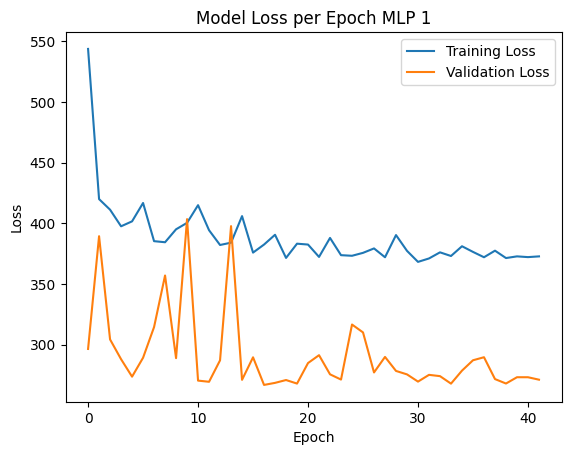

In [81]:
# Plot loss
import matplotlib.pyplot as plt

plt.plot(history_mlp.history['loss'], label='Training Loss')
plt.plot(history_mlp.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch MLP 1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

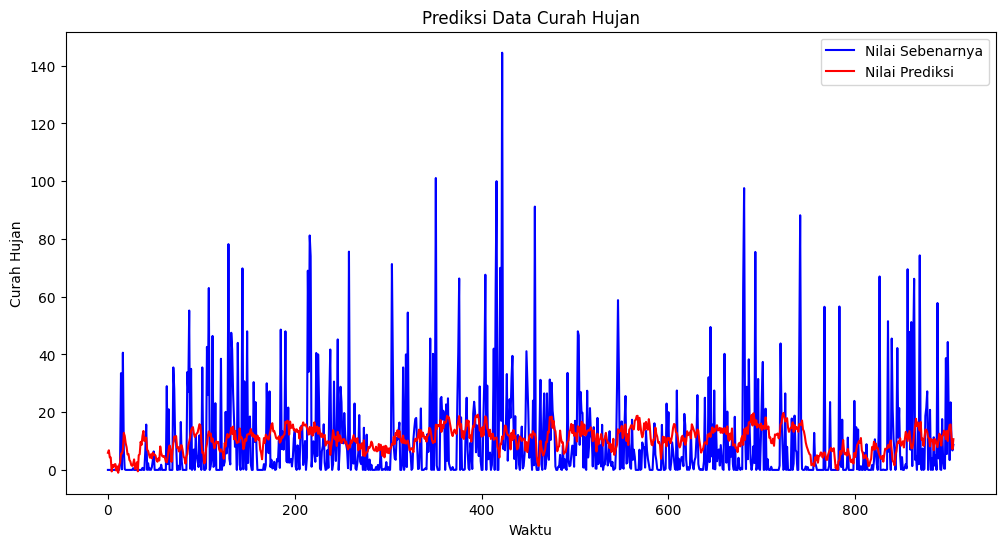

In [82]:
# Plot hasil prediksi vs nilai sebenarnya
plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Nilai Sebenarnya')
plt.plot(test_predict_mlp, color='red', label='Nilai Prediksi')
plt.title('Prediksi Data Curah Hujan')
plt.xlabel('Waktu')
plt.ylabel('Curah Hujan')
plt.legend()
plt.show()

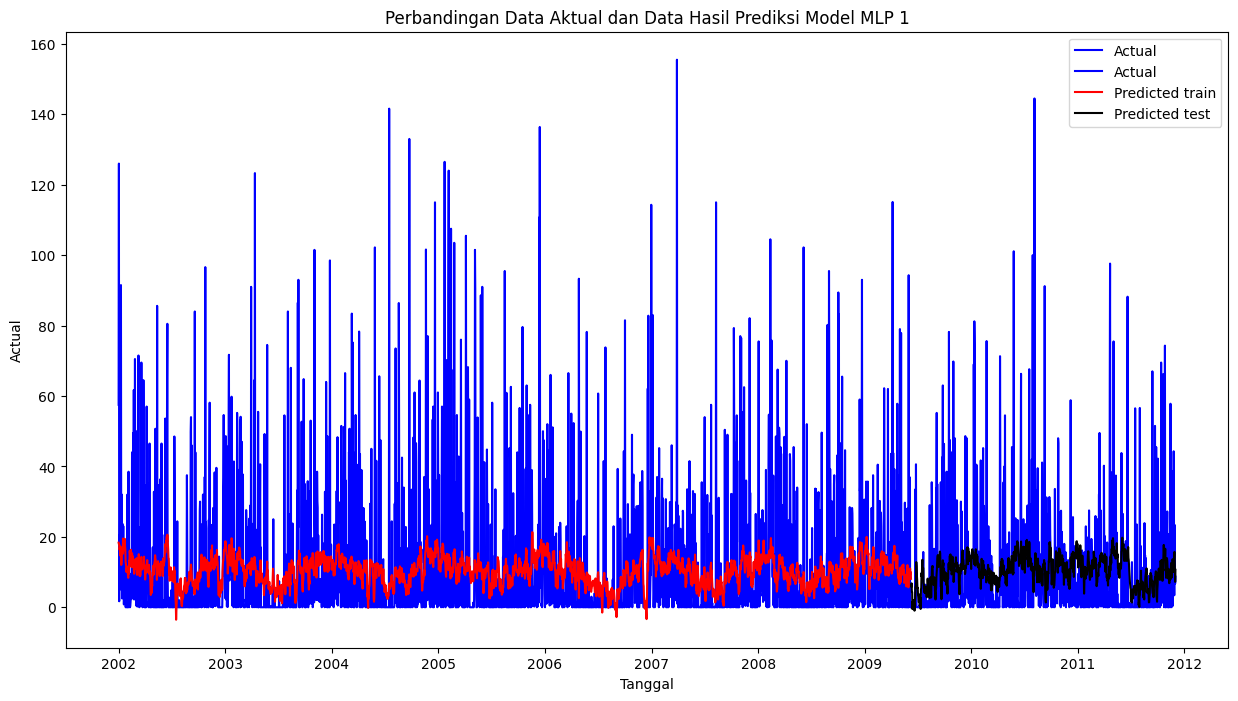

In [83]:
# Plot hasil prediksi vs nilai sebenarnya
train = pd.DataFrame()
train["Tanggal"] = data.index[data.index >= "2002-01-01"][:2716]
train["Actual"] = y_train
train["Predict"] = train_predict_mlp

test = pd.DataFrame()
test["Tanggal"] = data.index[data.index >= "2002-01-01"][2716:3622]
test["Actual"] = y_test
test["Predict"] = test_predict_mlp

# Membuat plot
fig, ax = plt.subplots(figsize = (15,8))

sns.lineplot(data = train, x = "Tanggal", y = "Actual", color = "blue", label = "Actual")
sns.lineplot(data = test, x = "Tanggal", y = "Actual", color = "blue", label = "Actual")
sns.lineplot(data = train, x = "Tanggal", y = "Predict", color = "red", label = "Predicted train")
sns.lineplot(data = test, x = "Tanggal", y = "Predict", color = "black", label = "Predicted test")
plt.title('Perbandingan Data Aktual dan Data Hasil Prediksi Model MLP 1')
plt.show()

# MLP 3 Dense

In [73]:
mlp2 = Sequential([
   Dense(64),
   Dense(64),
   Dense(64),
   Dense(1)
])

mlp2.compile(loss=tf.keras.losses.MeanSquaredError(),
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

# Fit the model
history_mlp2 = mlp2.fit(mlp_x_train, y_train, validation_data=(mlp_x_test, y_test), epochs=100, callbacks = [early_stopping])

Epoch 1/100
85/85 [==============================] - 1s 5ms/step - loss: 565.4082 - val_loss: 298.5049
Epoch 2/100
85/85 [==============================] - 0s 3ms/step - loss: 421.8415 - val_loss: 482.1711
Epoch 3/100
85/85 [==============================] - 0s 4ms/step - loss: 419.5366 - val_loss: 277.9899
Epoch 4/100
85/85 [==============================] - 0s 4ms/step - loss: 400.5192 - val_loss: 270.7377
Epoch 5/100
85/85 [==============================] - 0s 4ms/step - loss: 396.1654 - val_loss: 325.6677
Epoch 6/100
85/85 [==============================] - 0s 4ms/step - loss: 384.7865 - val_loss: 267.6461
Epoch 7/100
85/85 [==============================] - 0s 4ms/step - loss: 379.2224 - val_loss: 295.2687
Epoch 8/100
85/85 [==============================] - 0s 4ms/step - loss: 387.1256 - val_loss: 270.0196
Epoch 9/100
85/85 [==============================] - 0s 4ms/step - loss: 381.5640 - val_loss: 275.2821
Epoch 10/100
85/85 [==============================] - 0s 4ms/step - loss:

In [74]:
# Memprediksi nilai
train_predict_mlp2 = mlp2.predict(mlp_x_train)
test_predict_mlp2 = mlp2.predict(mlp_x_test)
print(f"""
MSE:
Traning    = {mean_squared_error(y_train, train_predict_mlp2)}
Testing    = {mean_squared_error(y_test, test_predict_mlp2)}

RMSE:
Traning    = {tf.sqrt(mean_squared_error(y_train, train_predict_mlp2))}
Testing    = {tf.sqrt(mean_squared_error(y_test, test_predict_mlp2))}
""")

29/29 [==============================] - 0s 2ms/step

MSE:
Traning    = 367.79721660967886
Testing    = 263.8114519686031

RMSE:
Traning    = 19.17803995745339
Testing    = 16.242273608353084



In [46]:
# Calculate R2 score for training and testing data
r2_train_mlp2 = r2_score(y_train, train_predict_mlp2)
r2_test_mlp2 = r2_score(y_test, test_predict_mlp2)

print(f"""
R2 Score:
Training = {r2_train_mlp2}
Testing  = {r2_test_mlp2}
""")


R2 Score:
Training = 0.05216049920427157
Testing  = 0.037065115627807566



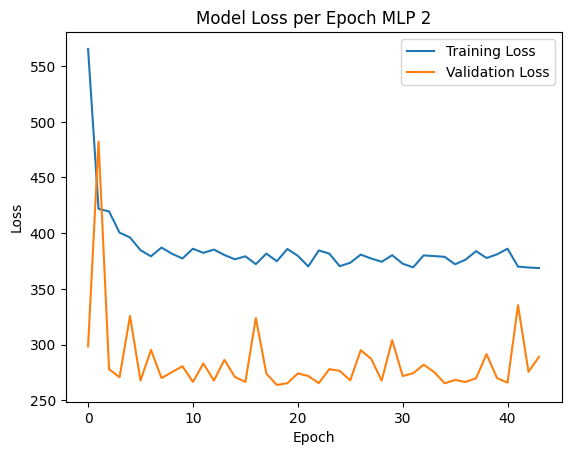

In [76]:
# Plot loss
import matplotlib.pyplot as plt

plt.plot(history_mlp2.history['loss'], label='Training Loss')
plt.plot(history_mlp2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch MLP 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

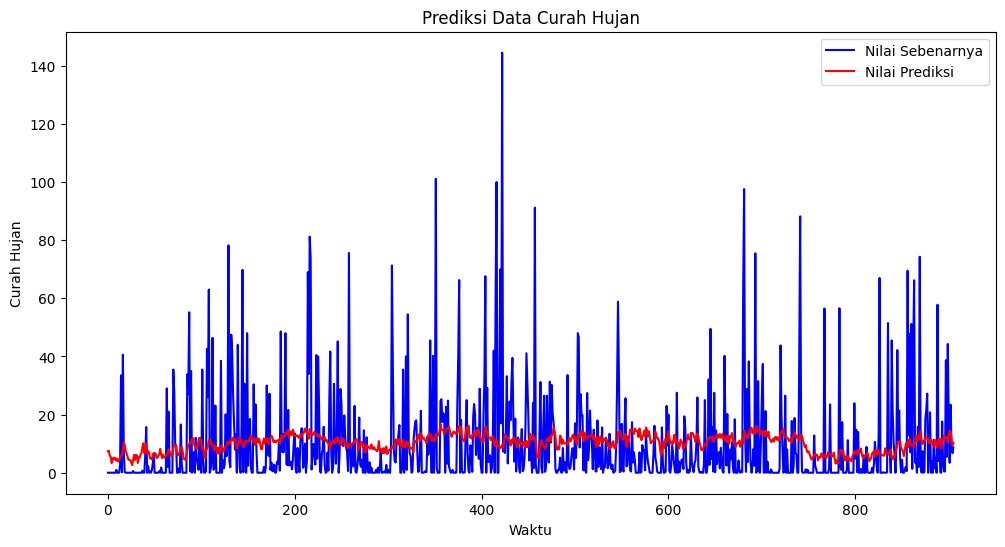

In [48]:
# Plot hasil prediksi vs nilai sebenarnya
plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Nilai Sebenarnya')
plt.plot(test_predict_mlp2, color='red', label='Nilai Prediksi')
plt.title('Prediksi Data Curah Hujan')
plt.xlabel('Waktu')
plt.ylabel('Curah Hujan')
plt.legend()
plt.show()

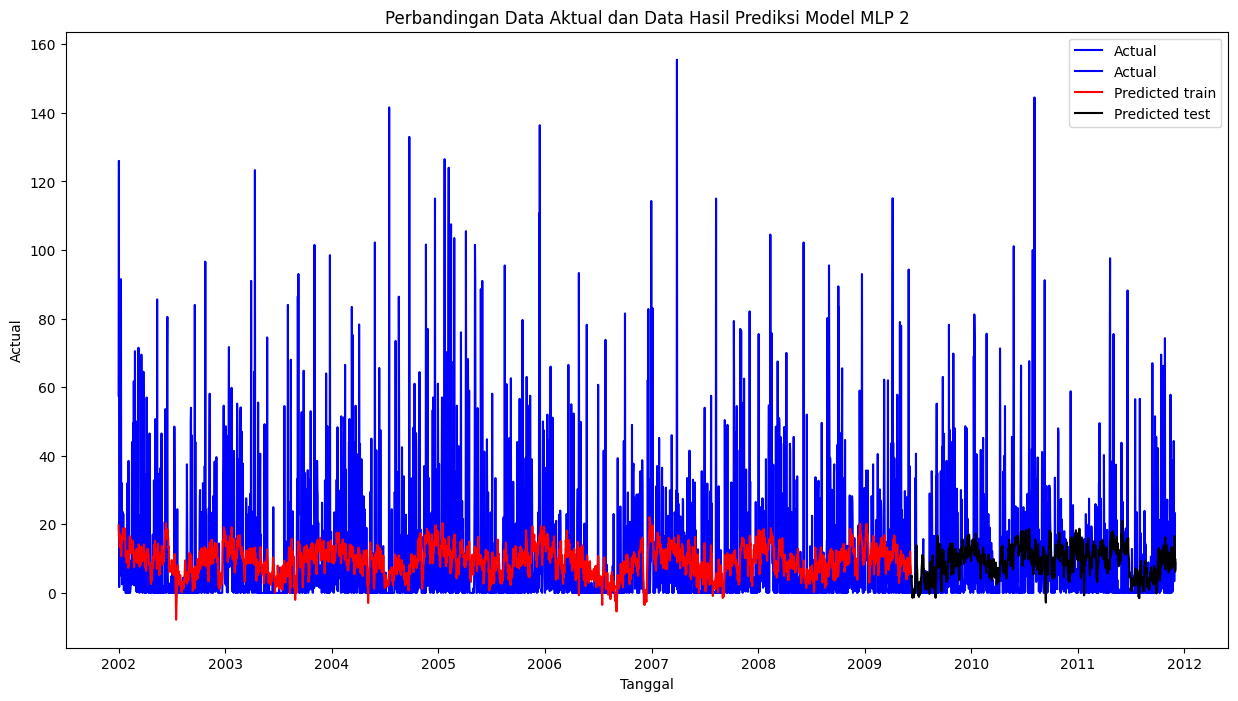

In [77]:
# Plot hasil prediksi vs nilai sebenarnya
train = pd.DataFrame()
train["Tanggal"] = data.index[data.index >= "2002-01-01"][:2716]
train["Actual"] = y_train
train["Predict"] = train_predict_mlp2

test = pd.DataFrame()
test["Tanggal"] = data.index[data.index >= "2002-01-01"][2716:3622]
test["Actual"] = y_test
test["Predict"] = test_predict_mlp2

# Membuat plot
fig, ax = plt.subplots(figsize = (15,8))

sns.lineplot(data = train, x = "Tanggal", y = "Actual", color = "blue", label = "Actual")
sns.lineplot(data = test, x = "Tanggal", y = "Actual", color = "blue", label = "Actual")
sns.lineplot(data = train, x = "Tanggal", y = "Predict", color = "red", label = "Predicted train")
sns.lineplot(data = test, x = "Tanggal", y = "Predict", color = "black", label = "Predicted test")
plt.title('Perbandingan Data Aktual dan Data Hasil Prediksi Model MLP 2')
plt.show()

# MLP 4 Dense

In [84]:
mlp3 = Sequential([
    Dense(64),
    Dense(64),
    Dense(64),
    Dense(64),
    Dense(1)
])

mlp3.compile(loss=tf.keras.losses.MeanSquaredError(),
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

# Fit the model
history_mlp3 = mlp3.fit(mlp_x_train, y_train, validation_data=(mlp_x_test, y_test), epochs=100, callbacks = [early_stopping])

Epoch 1/100
85/85 [==============================] - 2s 6ms/step - loss: 940.9196 - val_loss: 289.9853
Epoch 2/100
85/85 [==============================] - 0s 4ms/step - loss: 399.8492 - val_loss: 307.7592
Epoch 3/100
85/85 [==============================] - 0s 4ms/step - loss: 394.0142 - val_loss: 271.2202
Epoch 4/100
85/85 [==============================] - 0s 4ms/step - loss: 399.6252 - val_loss: 268.0724
Epoch 5/100
85/85 [==============================] - 0s 4ms/step - loss: 384.6921 - val_loss: 299.1998
Epoch 6/100
85/85 [==============================] - 0s 4ms/step - loss: 389.7886 - val_loss: 282.4996
Epoch 7/100
85/85 [==============================] - 0s 5ms/step - loss: 389.1439 - val_loss: 265.3734
Epoch 8/100
85/85 [==============================] - 0s 4ms/step - loss: 386.5877 - val_loss: 276.0125
Epoch 9/100
85/85 [==============================] - 0s 5ms/step - loss: 382.7265 - val_loss: 268.0118
Epoch 10/100
85/85 [==============================] - 0s 4ms/step - loss:

In [85]:
# Memprediksi nilai
train_predict_mlp3 = mlp3.predict(mlp_x_train)
test_predict_mlp3 = mlp3.predict(mlp_x_test)
print(f"""
MSE:
Traning    = {mean_squared_error(y_train, train_predict_mlp3)}
Testing    = {mean_squared_error(y_test, test_predict_mlp3)}

RMSE:
Traning    = {tf.sqrt(mean_squared_error(y_train, train_predict_mlp3))}
Testing    = {tf.sqrt(mean_squared_error(y_test, test_predict_mlp3))}
""")

29/29 [==============================] - 0s 4ms/step

MSE:
Traning    = 361.98572383614356
Testing    = 262.51080805523657

RMSE:
Traning    = 19.025922417484615
Testing    = 16.20218528641234



In [86]:
# Calculate R2 score for training and testing data
r2_train_mlp3 = r2_score(y_train, train_predict_mlp3)
r2_test_mlp3 = r2_score(y_test, test_predict_mlp3)

print(f"""
R2 Score:
Training = {r2_train_mlp3}
Testing  = {r2_test_mlp3}
""")


R2 Score:
Training = 0.08698914240336031
Testing  = 0.0497246495055802



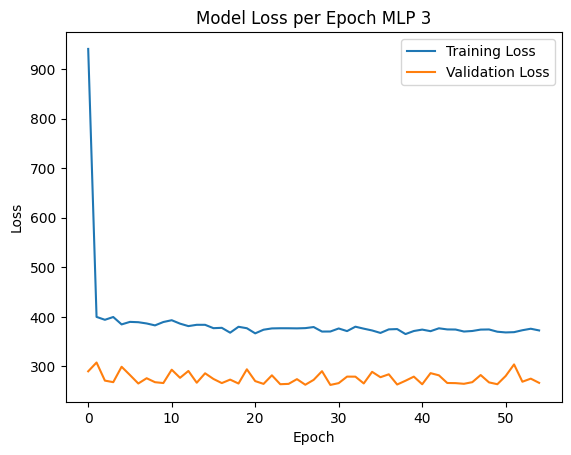

In [91]:
# Plot loss
import matplotlib.pyplot as plt

plt.plot(history_mlp3.history['loss'], label='Training Loss')
plt.plot(history_mlp3.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch MLP 3')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

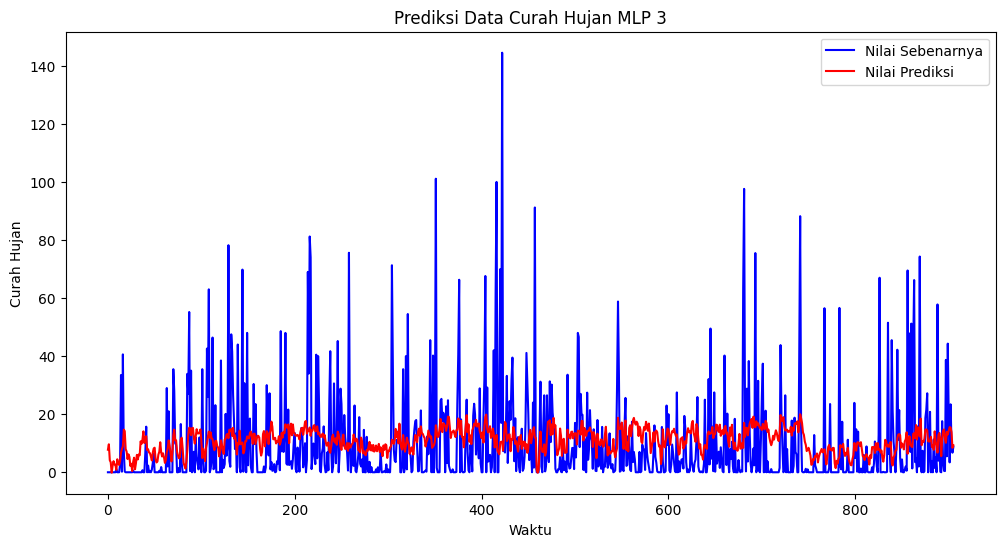

In [89]:
# Plot hasil prediksi vs nilai sebenarnya
plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Nilai Sebenarnya')
plt.plot(test_predict_mlp3, color='red', label='Nilai Prediksi')
plt.title('Prediksi Data Curah Hujan MLP 3')
plt.xlabel('Waktu')
plt.ylabel('Curah Hujan')
plt.legend()
plt.show()

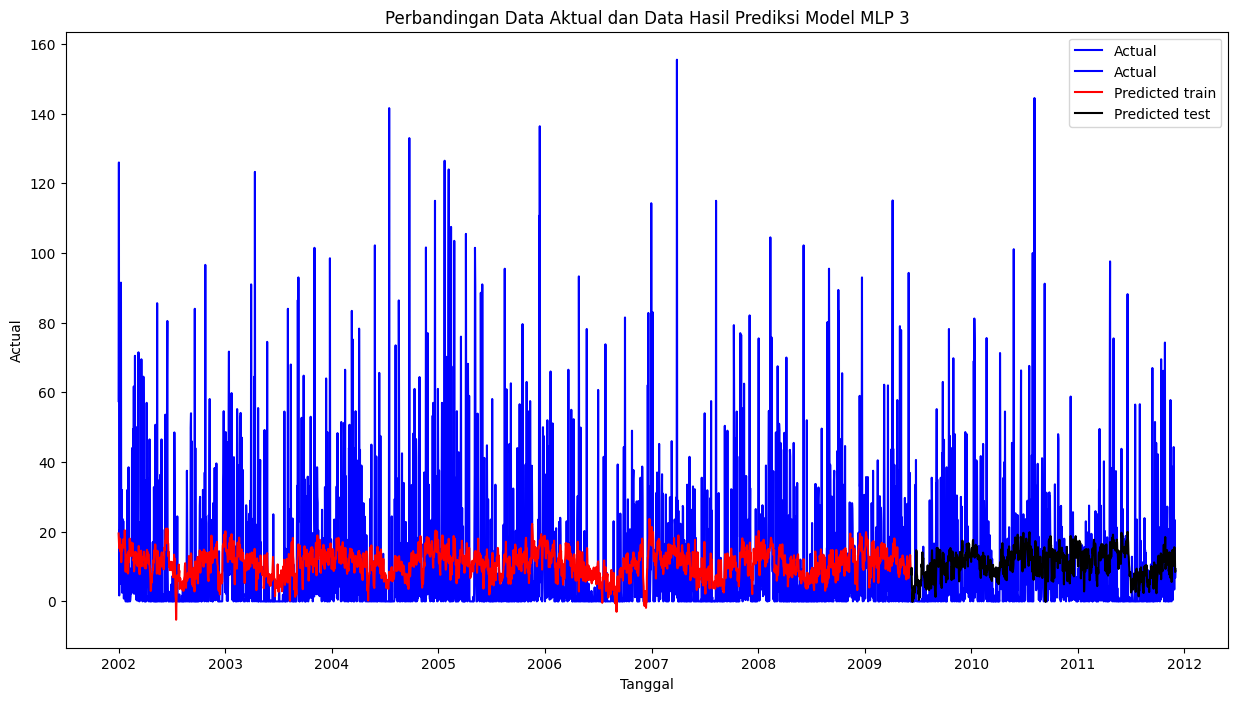

In [90]:
# Plot hasil prediksi vs nilai sebenarnya
train = pd.DataFrame()
train["Tanggal"] = data.index[data.index >= "2002-01-01"][:2716]
train["Actual"] = y_train
train["Predict"] = train_predict_mlp3

test = pd.DataFrame()
test["Tanggal"] = data.index[data.index >= "2002-01-01"][2716:3622]
test["Actual"] = y_test
test["Predict"] = test_predict_mlp3

# Membuat plot
fig, ax = plt.subplots(figsize = (15,8))

sns.lineplot(data = train, x = "Tanggal", y = "Actual", color = "blue", label = "Actual")
sns.lineplot(data = test, x = "Tanggal", y = "Actual", color = "blue", label = "Actual")
sns.lineplot(data = train, x = "Tanggal", y = "Predict", color = "red", label = "Predicted train")
sns.lineplot(data = test, x = "Tanggal", y = "Predict", color = "black", label = "Predicted test")
plt.title('Perbandingan Data Aktual dan Data Hasil Prediksi Model MLP 3')
plt.show()